In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in and read the data and preview 10 first rows
df = pd.read_excel('data/Actual_Generation_per_Production_Type_202001010000-202101010000.xlsx')
df.head(10)

,Actual Generation per Production Type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Aggregated Generation per Type [16.1.B&C],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Germany (DE) / 01.01.2020 00:00 - 01.01.2021 0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTU,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,...,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
4,NaN,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,...,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated,Actual Aggregated
5,NaN,[MW],[MW],[MW],[MW],[MW],[MW],[MW],[MW],[MW],...,[MW],[MW],[MW],[MW],[MW],[MW],[MW],[MW],[MW],[MW]
6,NaN,D,D,D,D,D,D,D,D,D,...,D,D,D,D,D,D,D,D,D,D
7,00:00 - 00:15,4865,9280,n/e,5077,1985,454,n/e,n/e,30,...,1320,54,n/e,8096,383,195,0,501,480,5909
8,00:15 - 00:30,4870,9304,n/e,4950,1948,454,n/e,n/e,30,...,1316,43,n/e,8083,377,192,0,507,483,5899
9,00:30 - 00:45,4859,9336,n/e,4857,1942,454,n/e,n/e,30,...,1311,43,n/e,8082,377,192,0,511,524,6116


### Initial preprocessing and cleaning of data

In [3]:
# Drop NaN rows from first column and update indices
df.dropna(axis='index', how='all', subset=['Actual Generation per Production Type'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Actual Generation per Production Type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Aggregated Generation per Type [16.1.B&C],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Germany (DE) / 01.01.2020 00:00 - 01.01.2021 0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MTU,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,...,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
3,00:00 - 00:15,4865,9280,n/e,5077,1985,454,n/e,n/e,30,...,1320,54,n/e,8096,383,195,0,501,480,5909
4,00:15 - 00:30,4870,9304,n/e,4950,1948,454,n/e,n/e,30,...,1316,43,n/e,8083,377,192,0,507,483,5899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35503,22:45 - 23:00,4592,11356,n/e,6802,4501,404,n/e,n/e,30,...,1172,31,n/e,8142,501,197,0,521,488,5022
35504,23:00 - 23:15,4603,11361,n/e,6760,4446,404,n/e,n/e,30,...,1170,17,n/e,8144,501,197,0,523,435,4913
35505,23:15 - 23:30,4601,11337,n/e,6646,4245,404,n/e,n/e,30,...,1171,23,n/e,8147,501,197,0,513,478,4718
35506,23:30 - 23:45,4590,11464,n/e,6288,4039,404,n/e,n/e,31,...,1169,28,n/e,8135,492,197,0,528,429,4582


In [4]:
# Drop first two rows with NaNs and reset indices
df.drop(index=[0,1], inplace = True)
df.reset_index(drop=True, inplace = True)
df

,Actual Generation per Production Type,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,MTU,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,...,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
1,00:00 - 00:15,4865,9280,n/e,5077,1985,454,n/e,n/e,30,...,1320,54,n/e,8096,383,195,0,501,480,5909
2,00:15 - 00:30,4870,9304,n/e,4950,1948,454,n/e,n/e,30,...,1316,43,n/e,8083,377,192,0,507,483,5899
3,00:30 - 00:45,4859,9336,n/e,4857,1942,454,n/e,n/e,30,...,1311,43,n/e,8082,377,192,0,511,524,6116
4,00:45 - 01:00,4852,9348,n/e,4782,1972,454,n/e,n/e,30,...,1311,39,n/e,8078,377,192,0,506,638,6244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35501,22:45 - 23:00,4592,11356,n/e,6802,4501,404,n/e,n/e,30,...,1172,31,n/e,8142,501,197,0,521,488,5022
35502,23:00 - 23:15,4603,11361,n/e,6760,4446,404,n/e,n/e,30,...,1170,17,n/e,8144,501,197,0,523,435,4913
35503,23:15 - 23:30,4601,11337,n/e,6646,4245,404,n/e,n/e,30,...,1171,23,n/e,8147,501,197,0,513,478,4718
35504,23:30 - 23:45,4590,11464,n/e,6288,4039,404,n/e,n/e,31,...,1169,28,n/e,8135,492,197,0,528,429,4582


In [5]:
# Replace header row with proper names and update indices
df.rename(columns=df.iloc[0], inplace = True)
df.drop(index=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,MTU,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,...,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,00:00 - 00:15,4865,9280,n/e,5077,1985,454,n/e,n/e,30,...,1320,54,n/e,8096,383,195,0,501,480,5909
1,00:15 - 00:30,4870,9304,n/e,4950,1948,454,n/e,n/e,30,...,1316,43,n/e,8083,377,192,0,507,483,5899
2,00:30 - 00:45,4859,9336,n/e,4857,1942,454,n/e,n/e,30,...,1311,43,n/e,8082,377,192,0,511,524,6116
3,00:45 - 01:00,4852,9348,n/e,4782,1972,454,n/e,n/e,30,...,1311,39,n/e,8078,377,192,0,506,638,6244
4,01:00 - 01:15,4851,9408,n/e,4587,1936,454,n/e,n/e,30,...,1311,64,n/e,8091,377,192,0,506,880,6065
5,01:15 - 01:30,4833,9422,n/e,4578,1841,454,n/e,n/e,30,...,1307,47,n/e,8089,377,192,0,508,1149,5722
6,01:30 - 01:45,4844,9421,n/e,4535,1760,454,n/e,n/e,30,...,1308,44,n/e,8090,377,192,0,502,1244,5750
7,01:45 - 02:00,4847,9425,n/e,4469,1764,454,n/e,n/e,30,...,1309,43,n/e,8088,377,192,0,484,1373,5775
8,02:00 - 02:15,4849,9455,n/e,4365,1794,455,n/e,n/e,30,...,1309,109,n/e,8095,370,192,0,491,1527,5752
9,02:15 - 02:30,4841,9403,n/e,4360,1790,454,n/e,n/e,30,...,1304,62,n/e,8091,370,192,0,502,1654,5699


In [6]:
df.columns

Index([                            'MTU',                         'Biomass',
             'Fossil Brown coal/Lignite',         'Fossil Coal-derived gas',
                            'Fossil Gas',                'Fossil Hard coal',
                            'Fossil Oil',                'Fossil Oil shale',
                           'Fossil Peat',                      'Geothermal',
                  'Hydro Pumped Storage',                               nan,
       'Hydro Run-of-river and poundage',           'Hydro Water Reservoir',
                                'Marine',                         'Nuclear',
                                 'Other',                 'Other renewable',
                                 'Solar',                           'Waste',
                         'Wind Offshore',                    'Wind Onshore'],
      dtype='object')

In [7]:
# Find the index number of uknown 'nan' column
for i, col in enumerate(df.columns):
    if type(col) != str:
        print(i)

11


In [8]:
# Remove column with index 11 by concatenating
# left side and right side of df from it
df = pd.concat([df.iloc[:, :11],df.iloc[:, 12:]], axis=1)
df.columns

Index(['MTU', 'Biomass', 'Fossil Brown coal/Lignite',
       'Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Hard coal',
       'Fossil Oil', 'Fossil Oil shale', 'Fossil Peat', 'Geothermal',
       'Hydro Pumped Storage', 'Hydro Run-of-river and poundage',
       'Hydro Water Reservoir', 'Marine', 'Nuclear', 'Other',
       'Other renewable', 'Solar', 'Waste', 'Wind Offshore', 'Wind Onshore'],
      dtype='object')

In [9]:
# Edit Datetime column and remove rows with NaNs 
# as well as columns with NaNs
df.rename(columns={"MTU": "Date and Time"}, inplace = True)
df.replace('n/e', np.nan, inplace=True)
df.dropna(axis='columns', how='all', inplace=True)
df.dropna(axis='rows', how='any', inplace=True)
df

,Date and Time,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,00:00 - 00:15,4865,9280,5077,1985,454,30,1064,1320,54,8096,383,195,0,501,480,5909
1,00:15 - 00:30,4870,9304,4950,1948,454,30,509,1316,43,8083,377,192,0,507,483,5899
2,00:30 - 00:45,4859,9336,4857,1942,454,30,409,1311,43,8082,377,192,0,511,524,6116
3,00:45 - 01:00,4852,9348,4782,1972,454,30,211,1311,39,8078,377,192,0,506,638,6244
4,01:00 - 01:15,4851,9408,4587,1936,454,30,91,1311,64,8091,377,192,0,506,880,6065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35500,22:45 - 23:00,4592,11356,6802,4501,404,30,1057,1172,31,8142,501,197,0,521,488,5022
35501,23:00 - 23:15,4603,11361,6760,4446,404,30,971,1170,17,8144,501,197,0,523,435,4913
35502,23:15 - 23:30,4601,11337,6646,4245,404,30,666,1171,23,8147,501,197,0,513,478,4718
35503,23:30 - 23:45,4590,11464,6288,4039,404,31,580,1169,28,8135,492,197,0,528,429,4582


In [22]:
# Format the units and set timesteps as index of df
df['Date and Time'] = pd.date_range(start='1/1/2020', periods=len(df), freq='15T')
df = df.set_index('Date and Time').astype(dtype=float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35136 entries, 2020-01-01 00:00:00 to 2020-12-31 23:45:00
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Biomass                          35136 non-null  float64
 1   Fossil Brown coal/Lignite        35136 non-null  float64
 2   Fossil Gas                       35136 non-null  float64
 3   Fossil Hard coal                 35136 non-null  float64
 4   Fossil Oil                       35136 non-null  float64
 5   Geothermal                       35136 non-null  float64
 6   Hydro Pumped Storage             35136 non-null  float64
 7   Hydro Run-of-river and poundage  35136 non-null  float64
 8   Hydro Water Reservoir            35136 non-null  float64
 9   Nuclear                          35136 non-null  float64
 10  Other                            35136 non-null  float64
 11  Other renewable                  35136 non-nu

### Hourly generation for each type of source

In [41]:
# Convert to hourly mean and divide by 1000000 to get units in [TWh]
df_hourly = df.resample('H').sum()/(4 * 1000000)
df_hourly

,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
Date and Time,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.004862,0.009317,0.004916,0.001962,0.000454,0.000030,0.000548,0.001314,0.000045,0.008085,0.000378,0.000193,0.0,0.000506,0.000531,0.006042
2020-01-01 01:00:00,0.004844,0.009419,0.004542,0.001825,0.000454,0.000030,0.000074,0.001309,0.000049,0.008089,0.000377,0.000192,0.0,0.000500,0.001161,0.005828
2020-01-01 02:00:00,0.004842,0.009426,0.004368,0.001797,0.000454,0.000030,0.000217,0.001303,0.000080,0.008082,0.000371,0.000192,0.0,0.000499,0.001659,0.005712
2020-01-01 03:00:00,0.004844,0.009497,0.004389,0.001899,0.000454,0.000030,0.000054,0.001296,0.000085,0.008073,0.000379,0.000196,0.0,0.000495,0.002057,0.005391
2020-01-01 04:00:00,0.004832,0.009550,0.004293,0.001922,0.000454,0.000030,0.000080,0.001292,0.000040,0.008074,0.000378,0.000196,0.0,0.000508,0.002291,0.005409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,0.004606,0.011374,0.007749,0.005254,0.000405,0.000029,0.004041,0.001170,0.000059,0.008143,0.000501,0.000197,0.0,0.000544,0.001474,0.007332
2020-12-31 20:00:00,0.004603,0.011362,0.007749,0.005251,0.000405,0.000029,0.001917,0.001170,0.000034,0.008136,0.000501,0.000197,0.0,0.000544,0.001169,0.006791
2020-12-31 21:00:00,0.004594,0.011458,0.007453,0.004846,0.000404,0.000030,0.000895,0.001164,0.000064,0.008139,0.000501,0.000197,0.0,0.000541,0.000947,0.006078


### Monthly generation for each type of source

In [64]:
# Resample and edit column names
df_monthly = df_hourly.resample('M').sum()

df_monthly.rename(columns={"Fossil Hard coal": "Hard coal", "Fossil Brown coal/Lignite": "Lignite",
                                    "Fossil Gas": "Gas", "Nuclear": "Nuclear", 
                                    "Solar": "Solar", "Biomass": "Bioenergy"}, inplace=True)

# Combine similar sources  
df_monthly['Other Fossil'] = df_monthly.iloc[:, [4, 10]].sum(axis=1)
df_monthly['Hydro'] = df_monthly.iloc[:, 6:9].sum(axis=1)
df_monthly['Wind'] = df_monthly.iloc[:, 14:16].sum(axis=1)
df_monthly['Other renewables'] = df_monthly.iloc[:, [5,11,13]].sum(axis=1)

cols = ['Hard coal', 'Lignite', 'Gas', 'Other Fossil', 'Nuclear', 
        'Wind', 'Solar', 'Bioenergy', 'Hydro', 'Other renewables']

df_monthly = df_monthly[cols]

# Add column with total generation by each type
df_monthly['Total'] = df_monthly.sum(axis=1)
df_monthly

,Hard coal,Lignite,Gas,Other Fossil,Nuclear,Wind,Solar,Bioenergy,Hydro,Other renewables,Total
Date and Time,,,,,,,,,,,
2020-01-31,4.578941,7.986459,5.696276,0.609681,5.811036,15.948539,1.097176,3.606533,1.929764,0.508170,47.772575
2020-02-29,2.356824,5.044714,4.034093,0.525130,5.164493,20.268256,1.671173,3.380424,2.176250,0.444097,45.065453
2020-03-31,2.721750,6.162297,4.306929,0.571774,5.407594,14.185496,4.104073,3.550947,2.294351,0.483646,43.788858
2020-04-30,1.321465,4.306926,3.359485,0.496897,4.725805,8.746591,6.316269,3.384866,2.152893,0.441773,35.252969
2020-05-31,1.584018,4.311047,4.100955,0.516855,4.286545,7.611533,6.196537,3.516730,2.364617,0.462051,34.950886
2020-06-30,1.441259,5.886977,5.237440,0.449903,4.656810,6.377887,5.718827,3.192207,2.253305,0.206921,35.421536
2020-07-31,1.579498,6.368462,5.888307,0.462507,4.231095,6.990165,6.284324,3.307917,2.434134,0.393704,37.940113
2020-08-31,2.175099,7.818585,5.189733,0.443305,5.595263,6.744781,5.438543,3.246608,2.310446,0.450850,39.413212
2020-09-30,4.067161,7.881417,4.750179,0.488735,5.293065,6.354895,4.631013,3.137801,2.187925,0.466443,39.258634


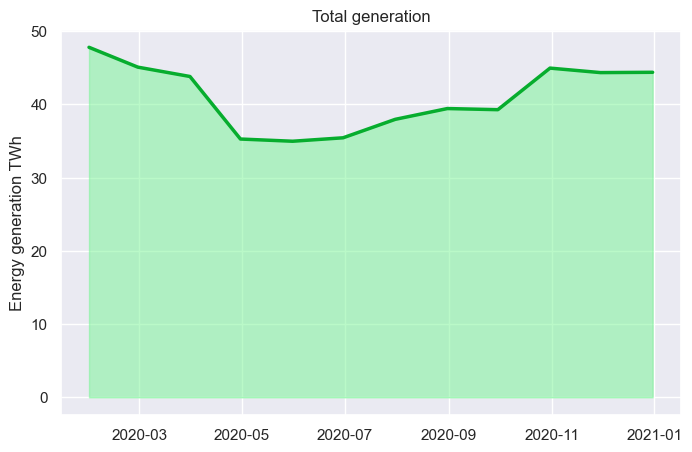

In [66]:
# Plot monthly total generation by all sources combined
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(figsize=(8,5), dpi=100)

ax.plot(df_monthly.index, df_monthly['Total'], '#07ad2e')

ax.fill_between(df_monthly.index, df_monthly['Total'], color='#76f593', alpha=0.5)


ax.set_ylabel('Energy generation TWh')
ax.set_title('Total generation');

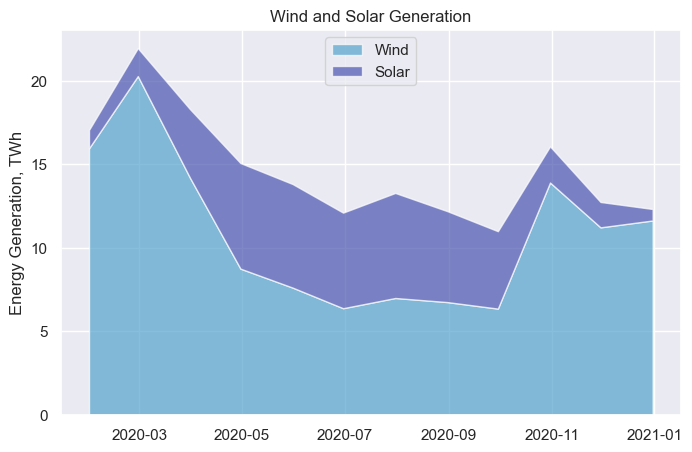

In [78]:
# Total generation by Wind and Solar energy
figure, ax = plt.subplots(figsize=(8,5), dpi=100)
pal = sns.color_palette("icefire")

y1 = df_monthly['Wind']
y2 = df_monthly['Solar']
y = [y1, y2]

plt.stackplot(df_monthly.index, y, 
              labels=['Wind','Solar'], colors=pal, alpha=0.7)

ax.set_ylabel('Energy Generation, TWh')
ax.set_title('Wind and Solar Generation')
ax.legend(loc=9);

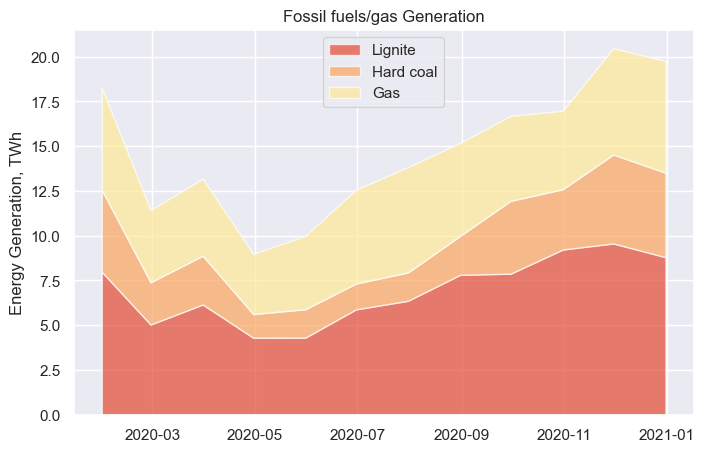

In [70]:
# Total generation by non-renewable energy sources
figure, ax = plt.subplots(figsize=(8,5), dpi=100)
pal = sns.color_palette("RdYlGn")

y1 = df_monthly['Lignite']
y2 = df_monthly['Hard coal']
y3 = df_monthly['Gas']
y = [y1, y2, y3]

plt.stackplot(df_monthly.index, y, 
              labels=['Lignite','Hard coal', 'Gas'], colors=pal, alpha=0.7)

ax.set_ylabel('Energy Generation, TWh')
ax.set_title('Fossil fuels/gas Generation')
ax.legend(loc=9);

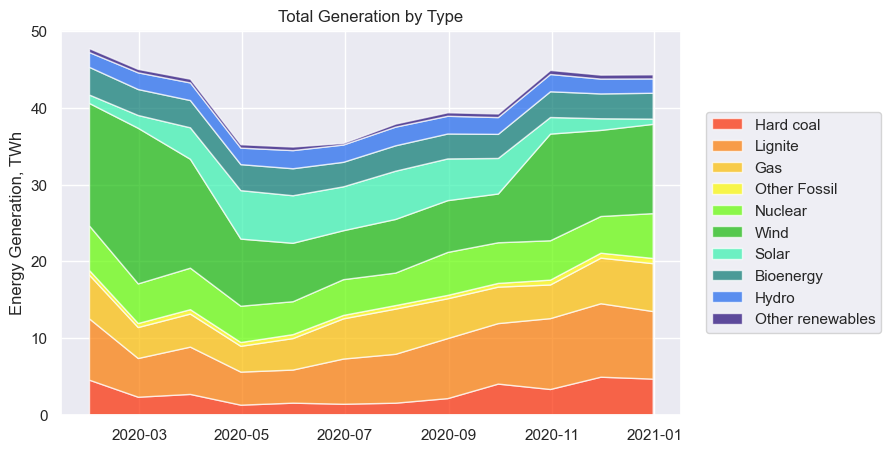

In [105]:
# Stack plot of total generation by source type
pal = ['#fc2a00', '#fc7a00', '#fcbd00', '#fcf800', '#61fc00', '#16b807', '#35f2ad', '#067870',
      '#1c66ed', '#1f0575', '#dd00ff']
figure, ax = plt.subplots(figsize=(8,5), dpi=100)

y = [df_monthly['Hard coal'],
    df_monthly['Lignite'],
    df_monthly['Gas'],
    df_monthly['Other Fossil'],
    df_monthly['Nuclear'],
    df_monthly['Wind'],
    df_monthly['Solar'],
    df_monthly['Bioenergy'],
    df_monthly['Hydro'],
    df_monthly['Other renewables']]

plt.stackplot(df_monthly.index, y, 
            labels=df_monthly.columns[:-1], colors=pal, alpha=0.7)

ax.set_ylabel('Energy Generation, TWh')
ax.set_title('Total Generation by Type')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0);

### Total Generation When Net Exporter 

In [106]:
# Import cross border flows to find days
# when Germany is eitgher net exporter or net importer
df_flows = pd.read_excel('data/Cross_Border_All_Flows.xlsx', index_col=[0]).resample('D').sum()

export_days = df_flows.loc[df_flows['Germany Export(GWh)'] > df_flows['Germany Import(GWh)']].index
import_days = df_flows.loc[df_flows['Germany Export(GWh)'] < df_flows['Germany Import(GWh)']].index

In [111]:
# Separate days when net exporter and net importer
df_daily_ex = df_hourly.resample('D').sum().loc[export_days]
df_daily_im = df_hourly.resample('D').sum().loc[import_days]

In [112]:
# Resample by month
df_month_ex = df_daily_ex.resample('M').sum()
df_month_im = df_daily_im.resample('M').sum()

In [125]:
# Rename some columns for clarity and combine similar sources of energy
cols = ['Hard coal', 'Lignite', 'Gas', 'Other Fossil', 'Nuclear', 
            'Wind', 'Solar', 'Bioenergy', 'Hydro', 'Other renewables']

for df in [df_month_ex, df_month_im]:
    df.rename(columns={"Fossil Hard coal": "Hard coal", "Fossil Brown coal/Lignite": "Lignite",
                                        "Fossil Gas": "Gas", "Nuclear": "Nuclear", 
                                        "Solar": "Solar", "Biomass": "Bioenergy"}, inplace=True)

    # Combine similar sources  
    df['Other Fossil'] = df.iloc[:, [4, 10]].sum(axis=1)
    df['Hydro'] = df.iloc[:, 6:9].sum(axis=1)
    df['Wind'] = df.iloc[:, 14:16].sum(axis=1)
    df['Other renewables'] = df.iloc[:, [5,11,13]].sum(axis=1)
    
df_month_ex = df_month_ex[cols]
df_month_im = df_month_im[cols]

In [126]:
df_month_ex

,Hard coal,Lignite,Gas,Other Fossil,Nuclear,Wind,Solar,Bioenergy,Hydro,Other renewables
Time,,,,,,,,,,
2020-01-31,4.578941,7.986460,5.696276,0.609681,5.811036,15.948539,1.097176,3.606533,1.929764,0.508170
2020-02-29,2.093221,4.525237,3.569426,0.486480,4.778030,19.671351,1.586486,3.146788,1.990997,0.413380
2020-03-31,1.952931,4.242986,2.959251,0.418960,3.955287,12.335509,2.987572,2.636883,1.690179,0.363119
2020-04-30,0.413983,1.316324,0.864848,0.162841,1.488005,4.987711,2.161141,1.130575,0.696874,0.136489
2020-05-31,0.302574,0.580156,0.385477,0.094102,0.834412,2.144433,1.205458,0.681666,0.405965,0.084137
2020-06-30,0.608106,2.280829,2.123991,0.208435,2.050368,4.165170,2.912121,1.502954,1.021972,0.098938
2020-07-31,0.485327,1.872518,1.826873,0.175092,1.527013,4.491747,2.428630,1.275566,0.908047,0.137563
2020-08-31,1.343714,4.780696,3.046066,0.286519,3.663243,5.545462,3.594989,2.093454,1.425455,0.289032
2020-09-30,2.660871,5.507118,3.199232,0.320520,3.864245,4.871935,3.625626,2.209582,1.517687,0.319887


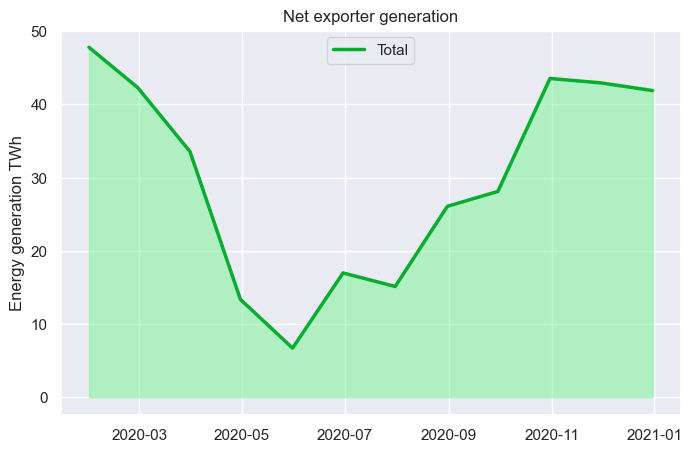

In [127]:
# Plot monthly total generation when Germany is net exporter
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(figsize=(8,5), dpi=100)

ax.plot(df_month_ex.index, df_month_ex.sum(axis=1), '#07ad2e', label='Total')
ax.fill_between(df_month_ex.index, df_month_ex.sum(axis=1), color='#76f593', alpha=0.5)

ax.set_ylabel('Energy generation TWh')
ax.set_title('Net exporter generation')
ax.legend(loc=9);


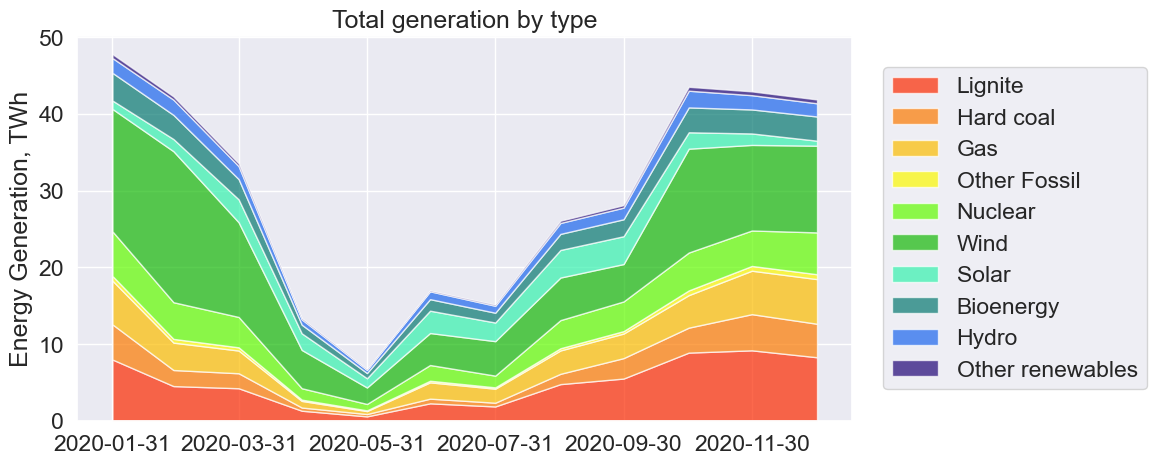

In [174]:
# Plot stacked generation by source when net exporter
fig, ax = plt.subplots(figsize=(10,5), dpi=100)

y = [
       df_month_ex['Lignite'],
       df_month_ex['Hard coal'],
       df_month_ex['Gas'],
       df_month_ex['Other Fossil'],
       df_month_ex['Nuclear'],
       df_month_ex['Wind'],
       df_month_ex['Solar'],
       df_month_ex['Bioenergy'],
       df_month_ex['Hydro'],
       df_month_ex['Other renewables']
       ]

ax.stackplot(df_month_ex.index, y, labels=['Lignite','Hard coal', 'Gas','Other Fossil', 'Nuclear', 'Wind',
       'Solar', 'Bioenergy', 'Hydro', 'Other renewables'], colors=pal, alpha=0.7 )
ax.set_ylabel('Energy Generation, TWh')
ax.set_xticks(df_month_ex.index[::2])
ax.set_title('Total generation by type')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0);


In [177]:
# Split generation source types into two categories
df_month_ex['Renewables'] = df_month_ex.iloc[:, 5:10].sum(axis=1)
df_month_ex['Non-Renewables'] = df_month_ex.iloc[:, 0:5].sum(axis=1)
df_month_ex_divided = df_month_ex.copy()
df_month_ex_divided.drop(df_month_ex.columns[0:10], axis=1, inplace=True)

C:\Users\sherd\AppData\Local\Temp\ipykernel_14124\1482766564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_ex['Renewables'] = df_month_ex.iloc[:, 5:10].sum(axis=1)
C:\Users\sherd\AppData\Local\Temp\ipykernel_14124\1482766564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_ex['Non-Renewables'] = df_month_ex.iloc[:, 0:5].sum(axis=1)


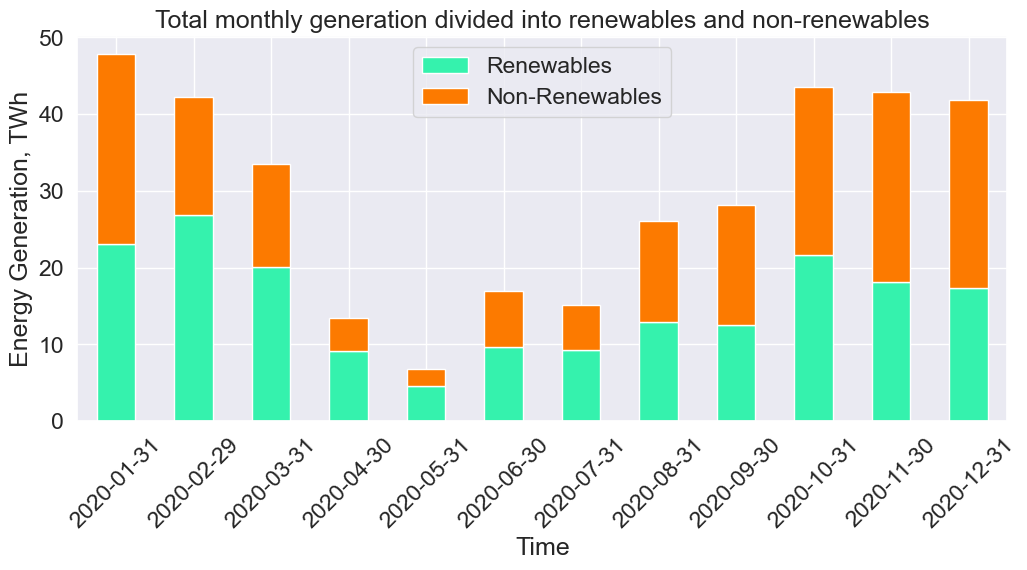

In [182]:
# Plot share of renewabels in monthly total generation
fig, ax = plt.subplots(figsize=(12,5))

df_month_ex_divided.plot.bar(stacked=True, color=['#35f2ad', '#fc7a00'], rot=45, ax=ax)
ax.set_xticklabels(df_month_ex_divided.index.format())
ax.legend(loc=9)
ax.set_ylabel('Energy Generation, TWh')
ax.set_title('Total monthly generation divided into renewables and non-renewables');

#### Total Generation when Net Importer

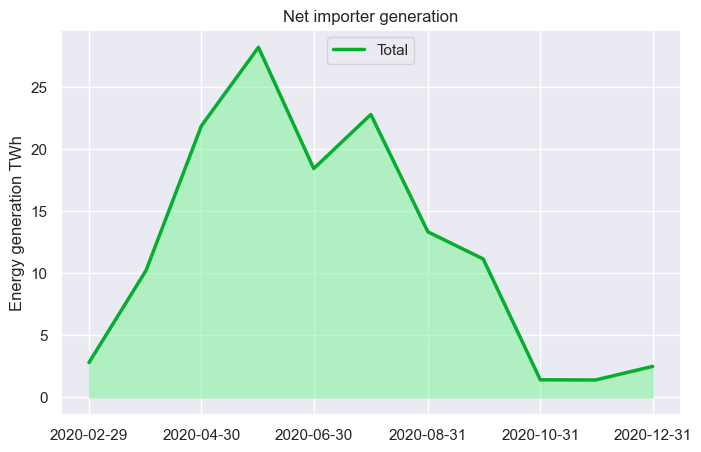

In [128]:
# Plot monthly total generation when Germany is net importer
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

ax.plot(df_month_im.index, df_month_im.sum(axis=1), color='#07ad2e', label='Total')
ax.fill_between(df_month_im.index, df_month_im.sum(axis=1), color='#76f593', alpha=0.5)

ax.set_ylabel('Energy generation TWh')
ax.set_xticks(df_month_im.index[::2])
ax.set_title('Net importer generation')
ax.legend(loc=9);

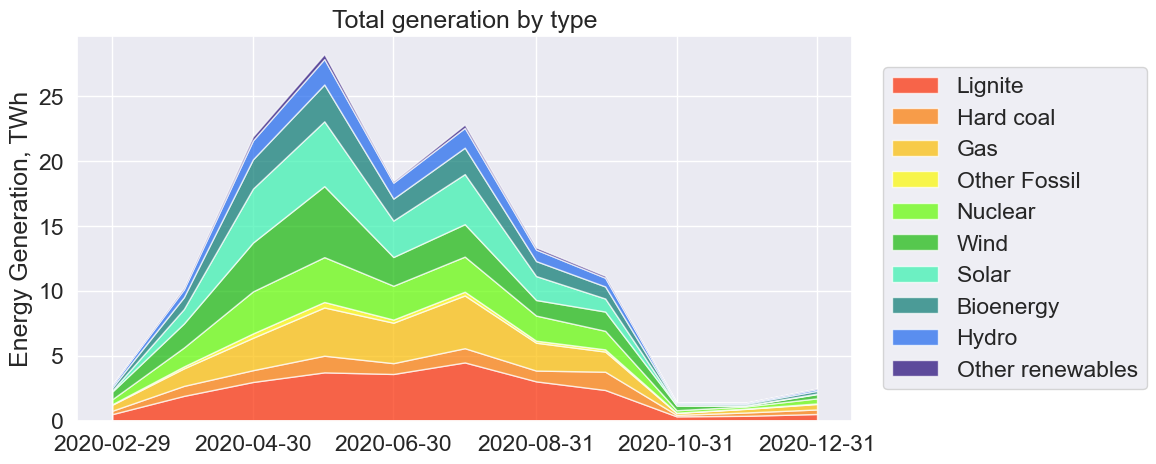

In [175]:
# Plot stacked generation by source when net importer
fig, ax = plt.subplots(figsize=(10,5), dpi=100)

y = [
       df_month_im['Lignite'],
       df_month_im['Hard coal'],
       df_month_im['Gas'],
       df_month_im['Other Fossil'],
       df_month_im['Nuclear'],
       df_month_im['Wind'],
       df_month_im['Solar'],
       df_month_im['Bioenergy'],
       df_month_im['Hydro'],
       df_month_im['Other renewables']
       ]

ax.stackplot(df_month_im.index, y, labels=['Lignite','Hard coal', 'Gas','Other Fossil', 'Nuclear', 'Wind',
       'Solar', 'Bioenergy', 'Hydro', 'Other renewables'], colors=pal, alpha=0.7 )
ax.set_ylabel('Energy Generation, TWh')
ax.set_xticks(df_month_im.index[::2])
ax.set_title('Total generation by type')
ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0);


In [183]:
# Split generation source types into two categories
df_month_im['Renewables'] = df_month_im.iloc[:, 5:10].sum(axis=1)
df_month_im['Non-Renewables'] = df_month_im.iloc[:, 0:5].sum(axis=1)
df_month_im_divided = df_month_im.copy()
df_month_im_divided.drop(df_month_im.columns[0:10], axis=1, inplace=True)

C:\Users\sherd\AppData\Local\Temp\ipykernel_14124\1112961863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_im['Renewables'] = df_month_im.iloc[:, 5:10].sum(axis=1)
C:\Users\sherd\AppData\Local\Temp\ipykernel_14124\1112961863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_im['Non-Renewables'] = df_month_im.iloc[:, 0:5].sum(axis=1)


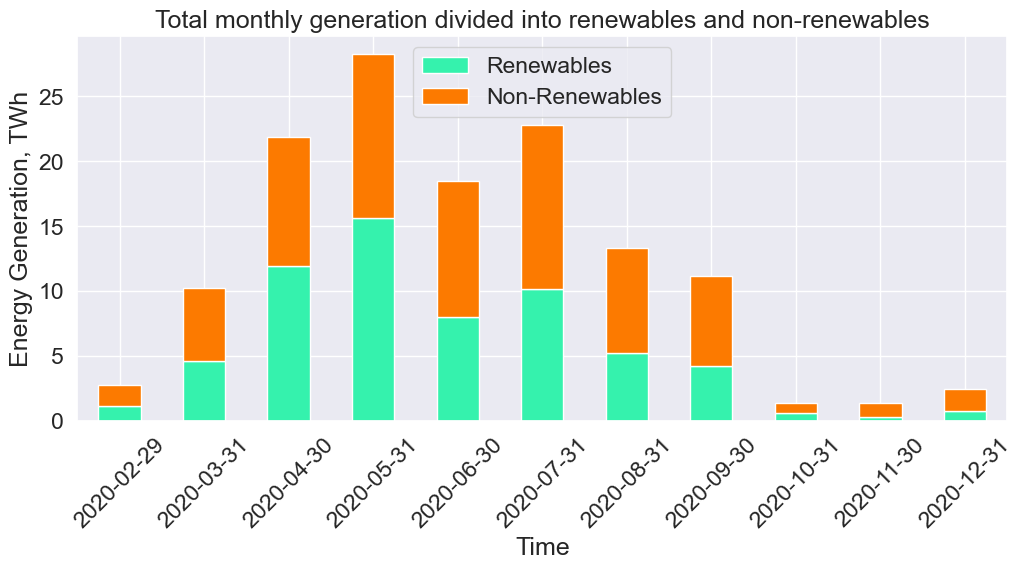

In [184]:
# Plot share of renewabels in monthly total generation
fig, ax = plt.subplots(figsize=(12,5))

df_month_im_divided.plot.bar(stacked=True, color=['#35f2ad', '#fc7a00'], rot=45, ax=ax)
ax.set_xticklabels(df_month_im_divided.index.format())
ax.legend(loc=9)
ax.set_ylabel('Energy Generation, TWh')
ax.set_title('Total monthly generation divided into renewables and non-renewables');

#### Plot total generation by source type for every month when Germany is net exporter

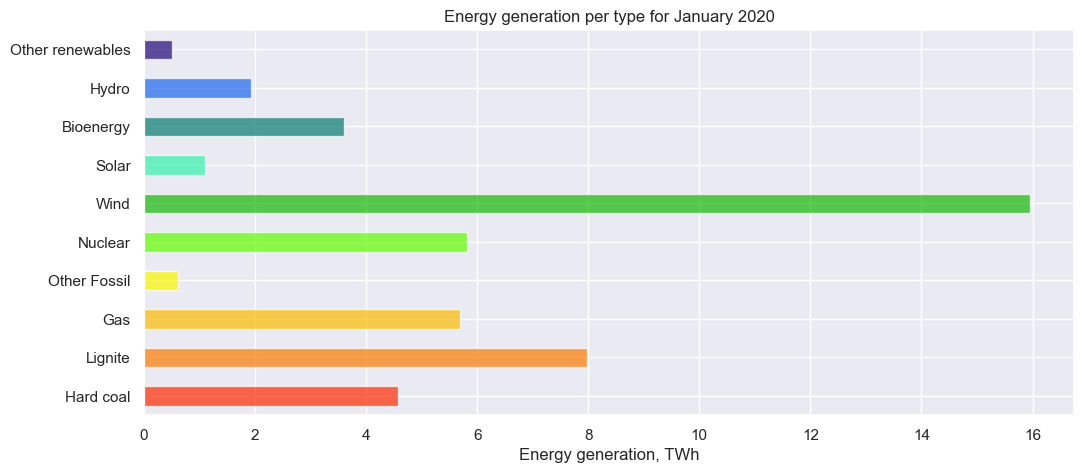

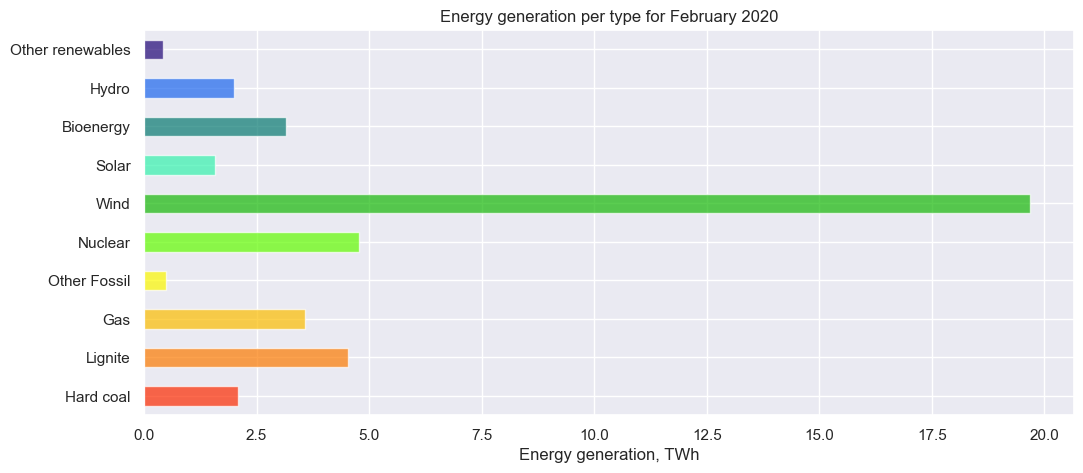

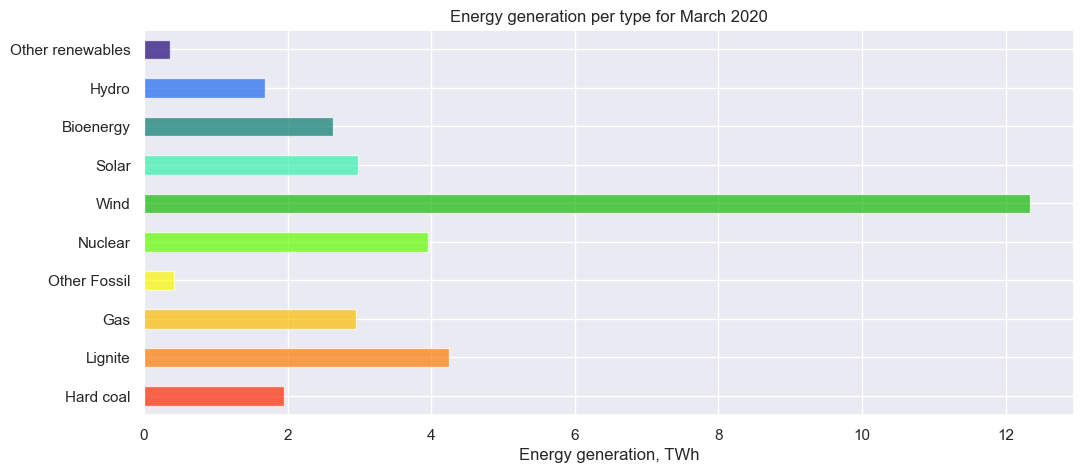

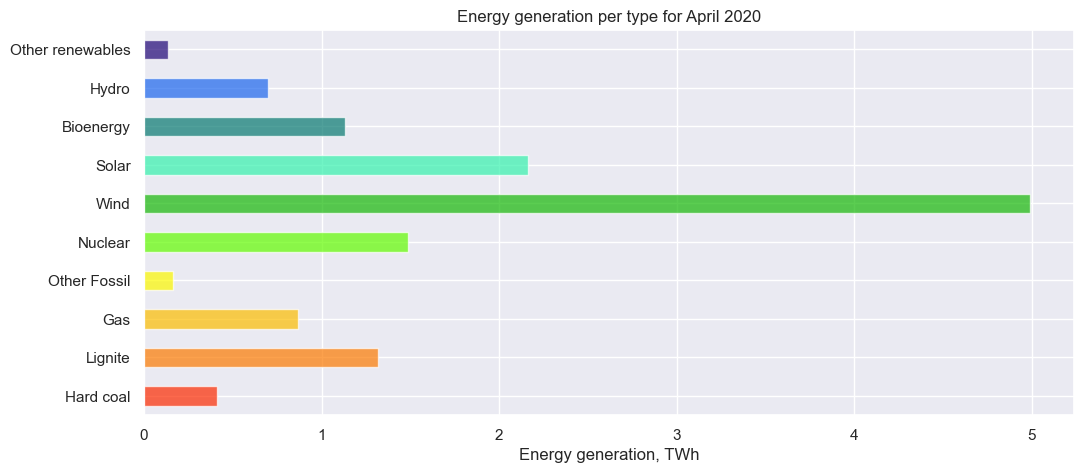

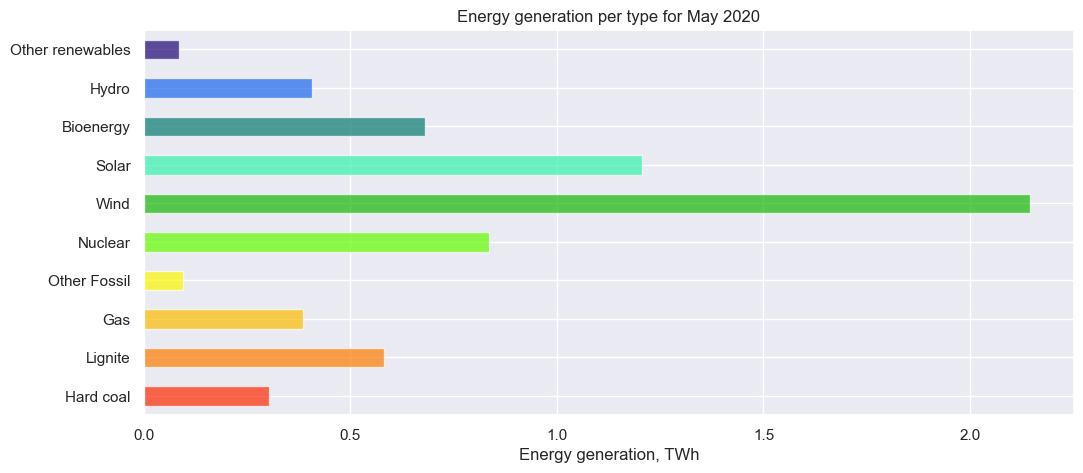

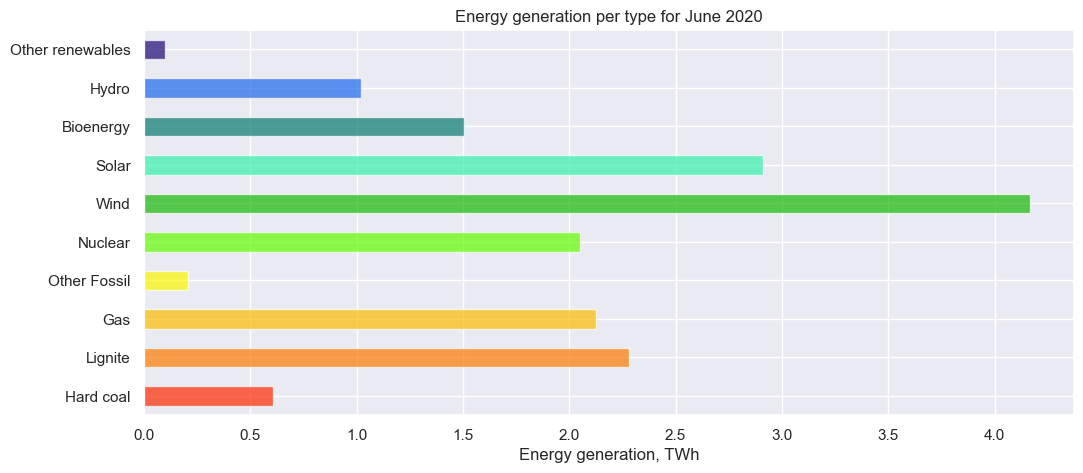

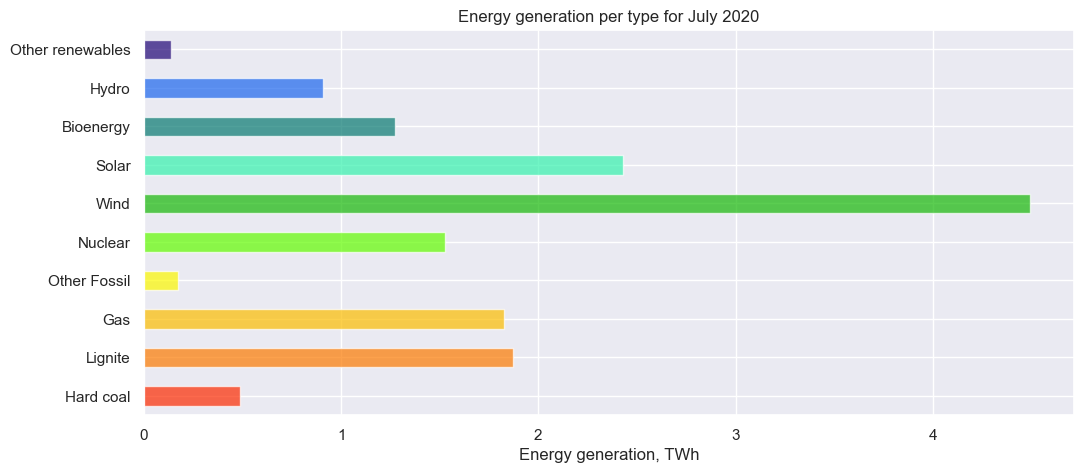

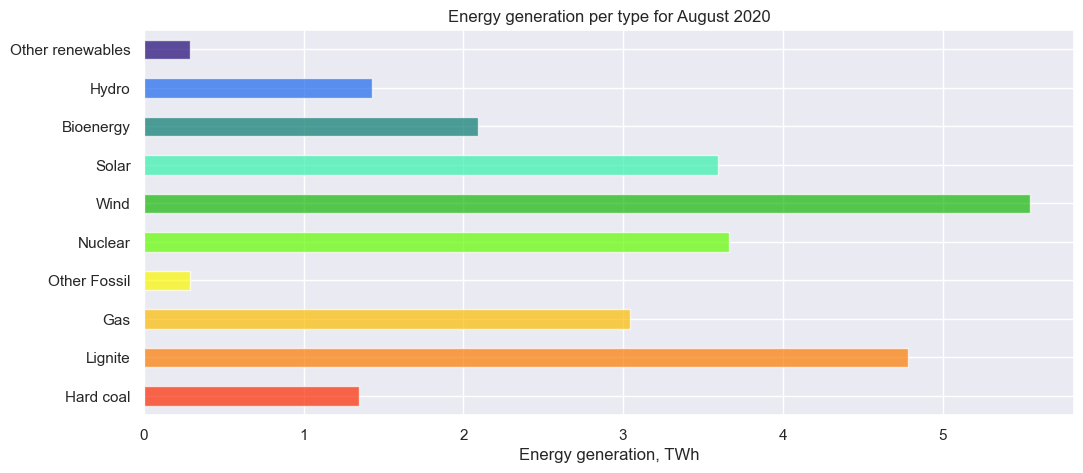

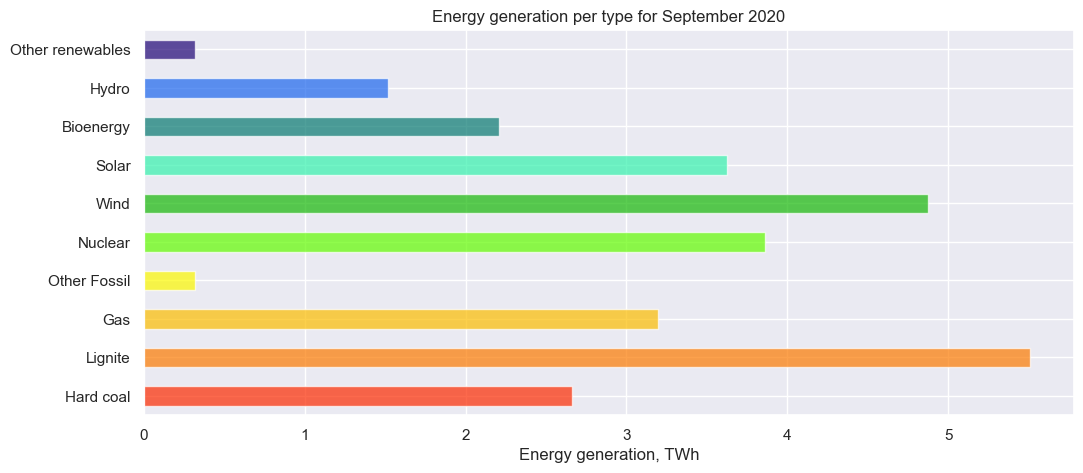

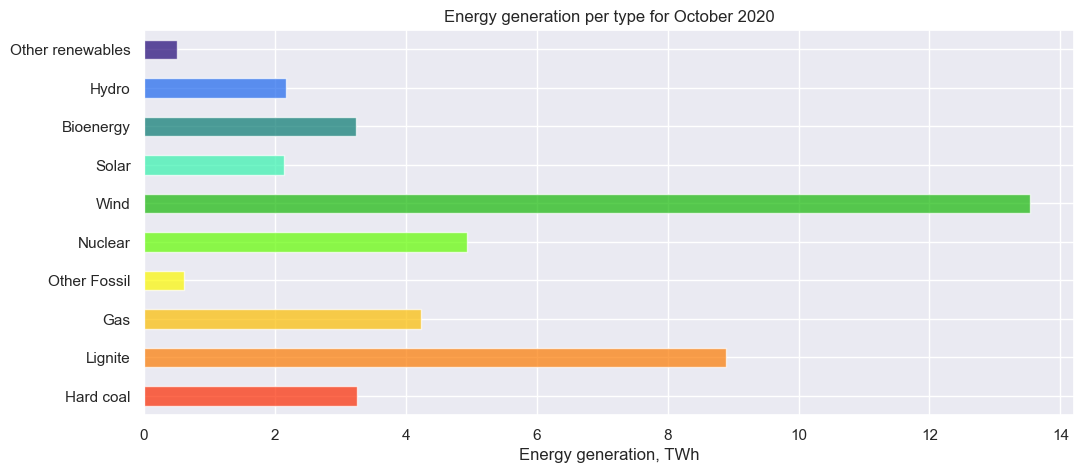

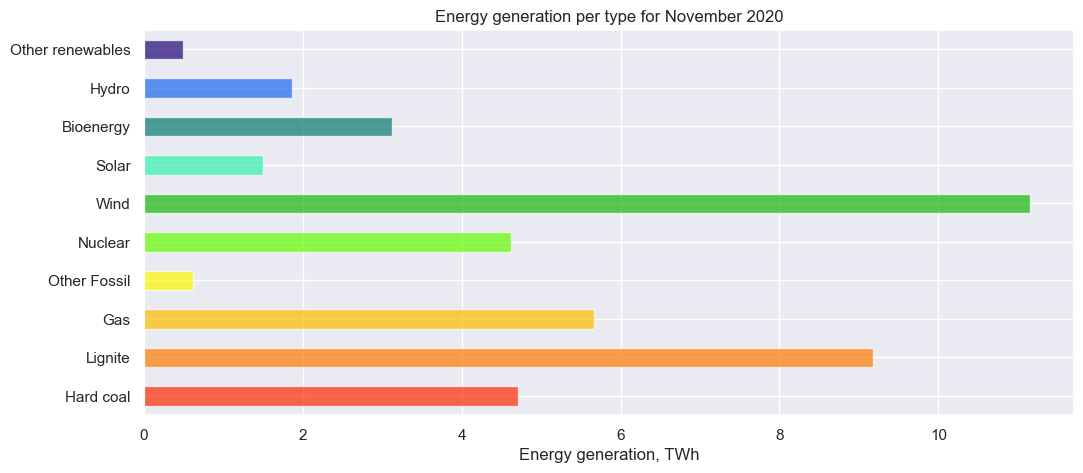

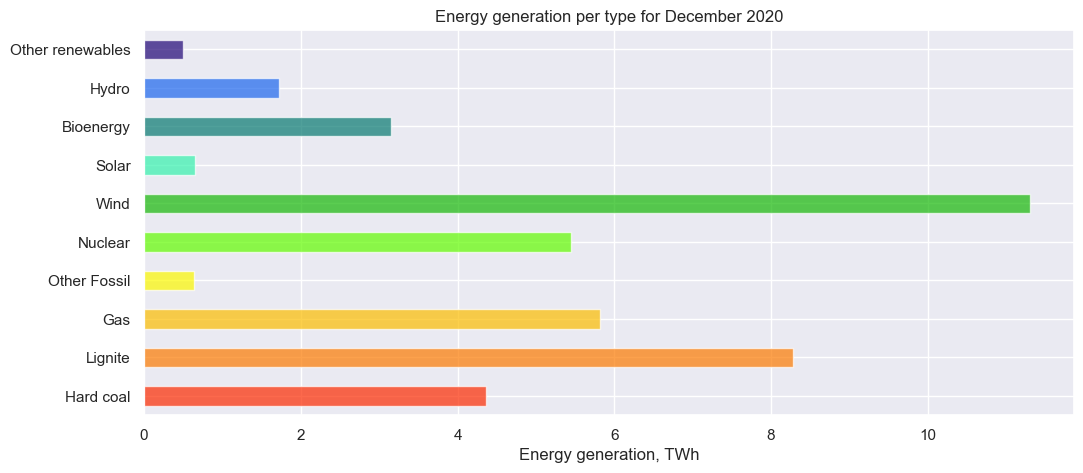

In [129]:
months_list = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
pal = ['#fc2a00', '#fc7a00', '#fcbd00', '#fcf800', '#61fc00', '#16b807', '#35f2ad', '#067870',
      '#1c66ed', '#1f0575', '#dd00ff']

# Plot for each month
for i in range(len(df_month_ex)):

    df_month_ex.iloc[i,:].plot.barh(figsize=(12,5), color=pal, alpha=0.7)
    plt.xlabel('Energy generation, TWh')
    plt.title(f'Energy generation per type for {months_list[i]} 2020')
    plt.show()

#### Plot total generation by source type for every month when Germany is net exporter

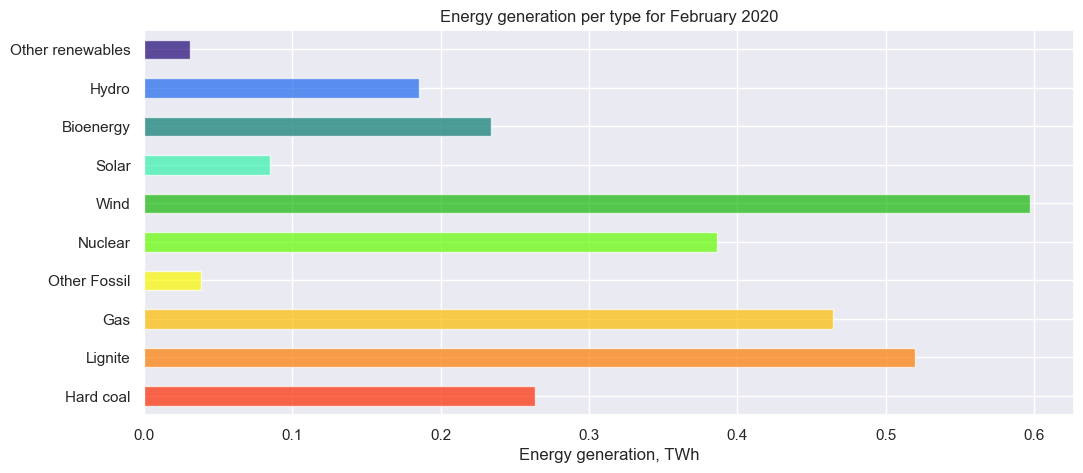

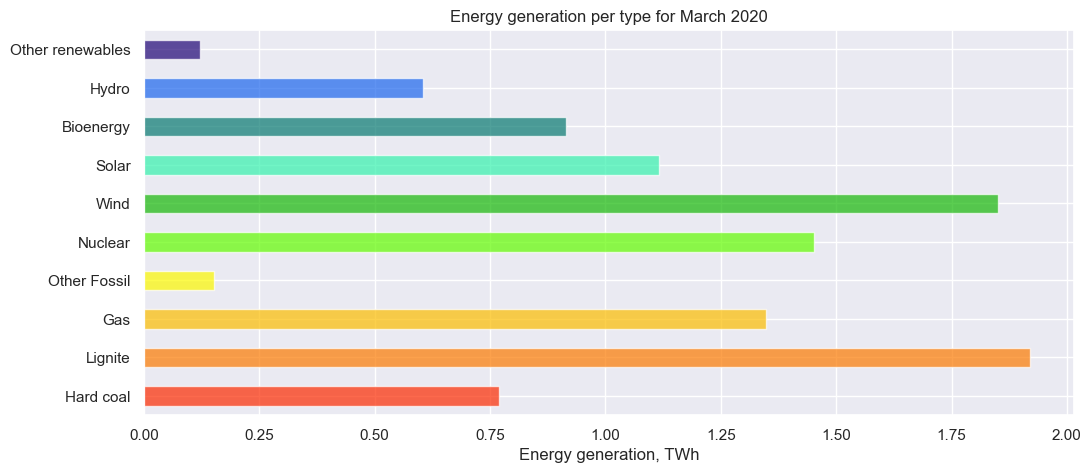

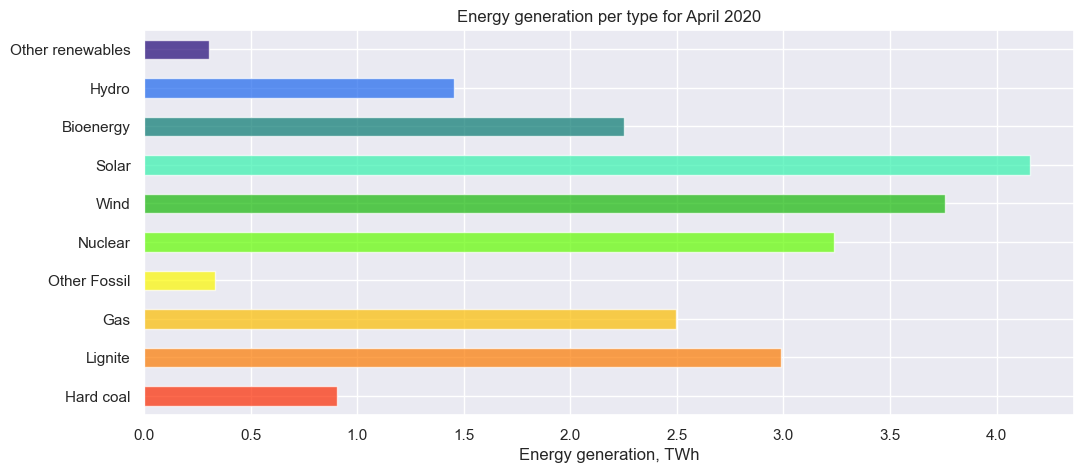

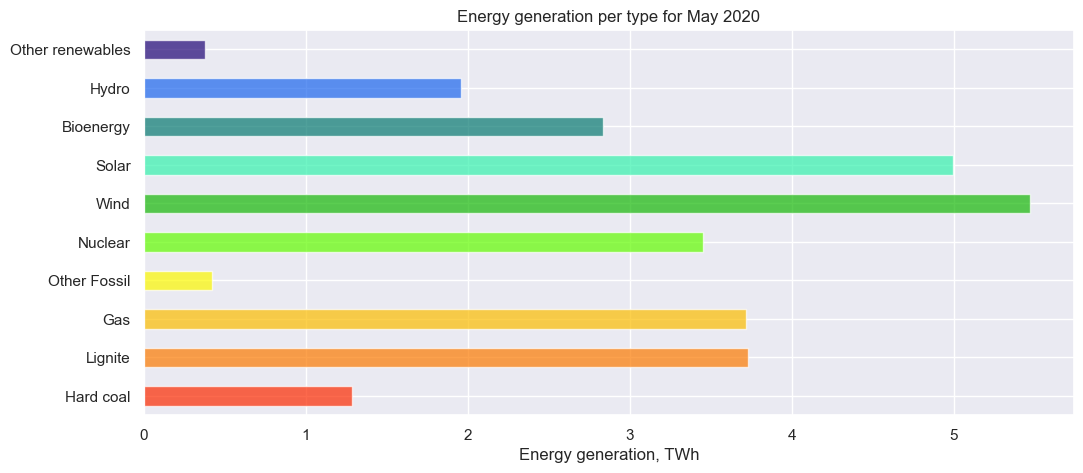

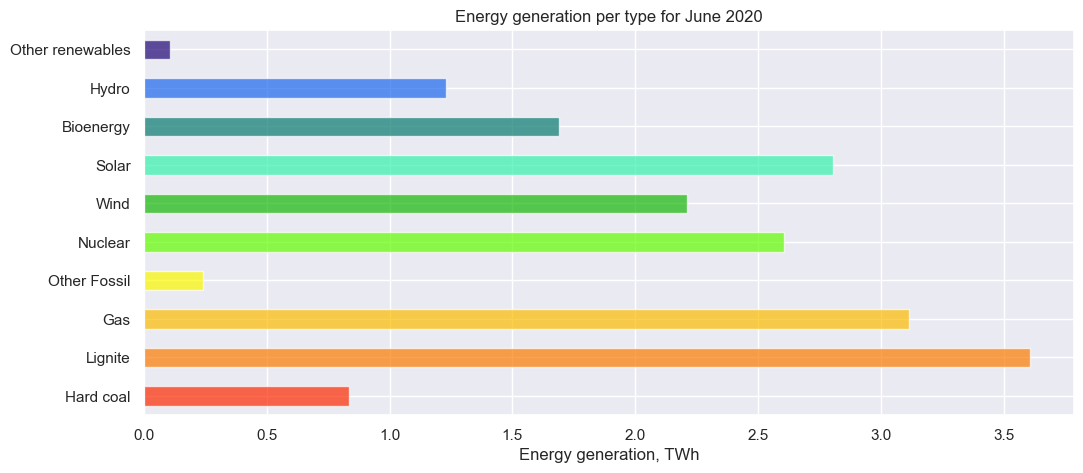

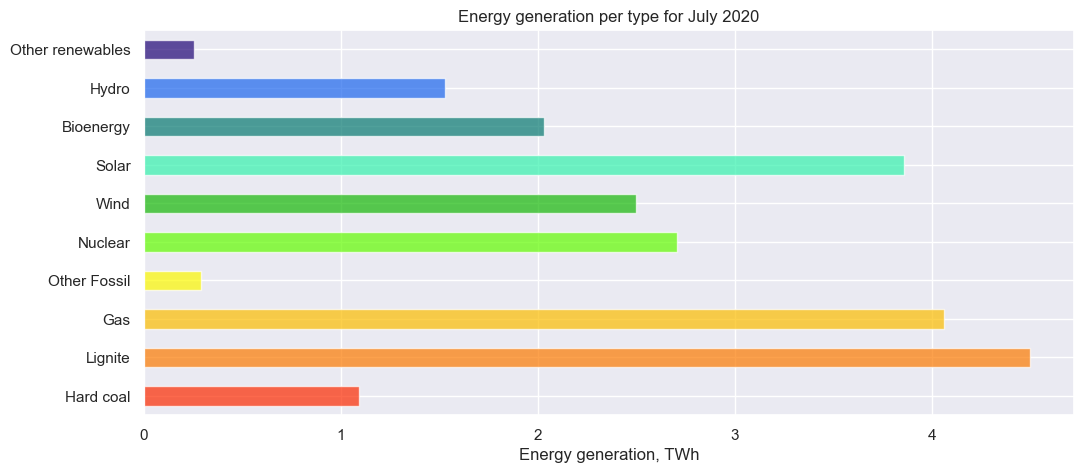

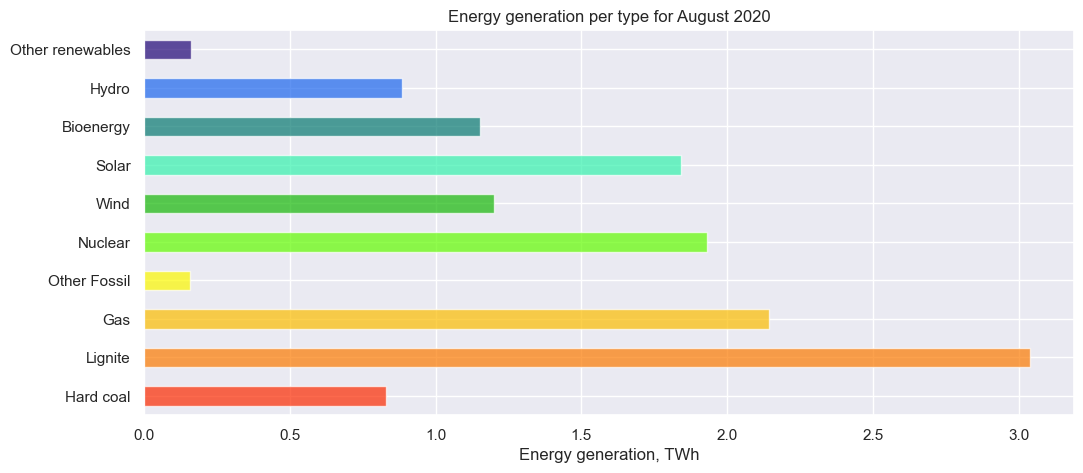

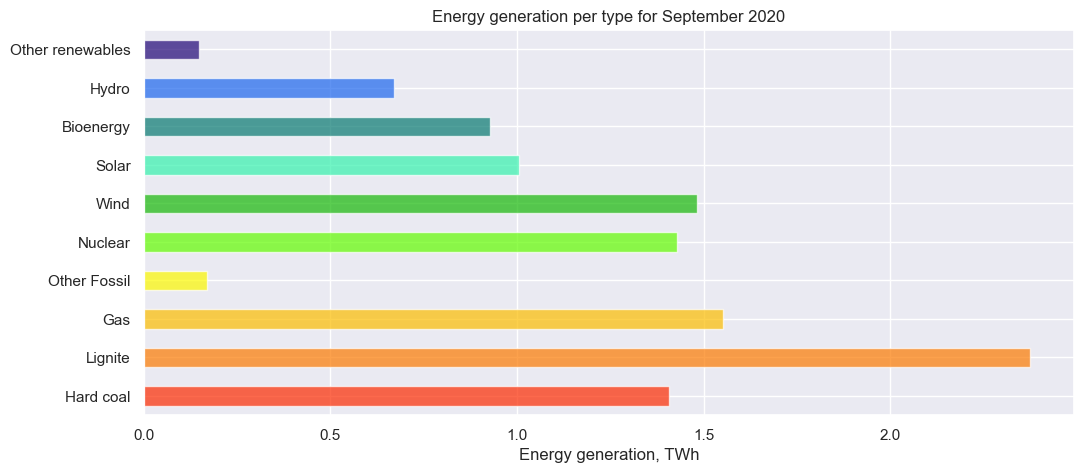

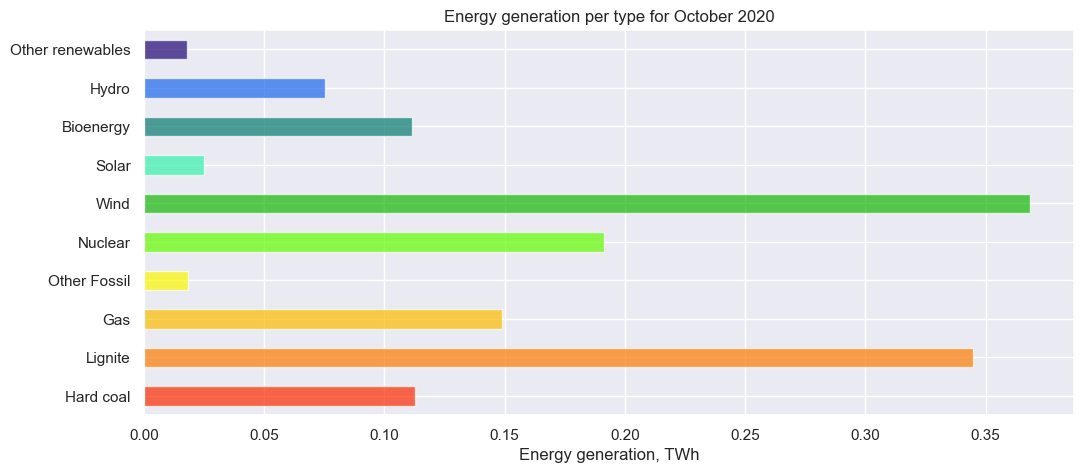

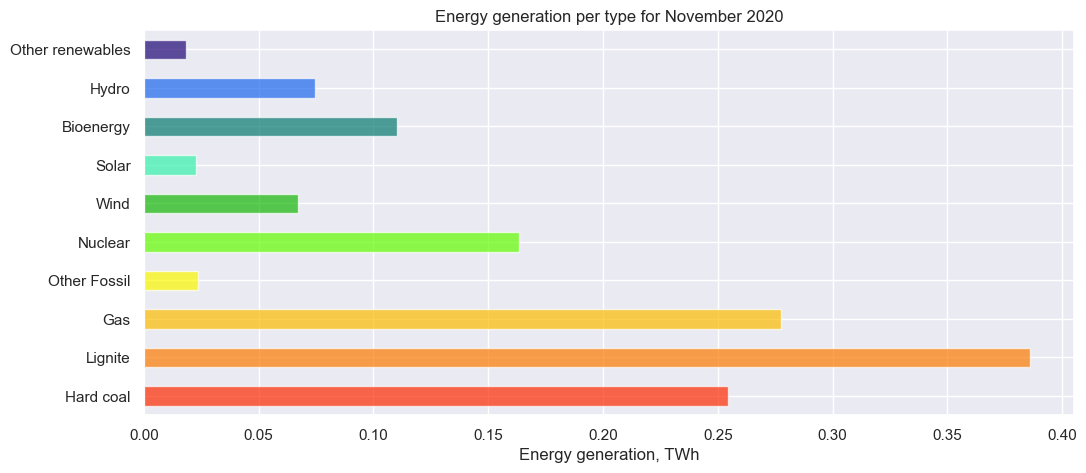

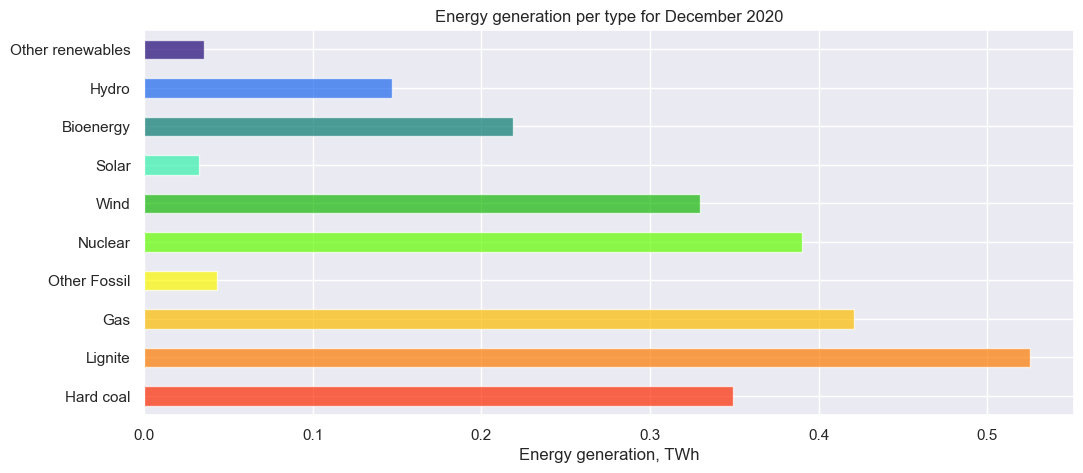

In [131]:
months_list = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
pal = ['#fc2a00', '#fc7a00', '#fcbd00', '#fcf800', '#61fc00', '#16b807', '#35f2ad', '#067870',
      '#1c66ed', '#1f0575', '#dd00ff']

# Plot for each month
for i in range(len(df_month_im)):

    df_month_im.iloc[i,:].plot.barh(figsize=(12,5), color=pal, alpha=0.7)
    plt.xlabel('Energy generation, TWh')
    plt.title(f'Energy generation per type for {months_list[i+1]} 2020')
    plt.show()

#### Max/Min daily generation when Germany is net exporter

In [144]:
# Dates for max/min total daily generation when net exporter
ex_max_date = df_daily_ex.loc[df_daily_ex.sum(axis=1) == df_daily_ex.sum(axis=1).max()].index[0]
ex_min_date = df_daily_ex.loc[df_daily_ex.sum(axis=1) == df_daily_ex.sum(axis=1).min()].index[0]

# Dates for max/min total daily generation when net importer
im_max_date = df_daily_im.loc[df_daily_im.sum(axis=1) == df_daily_im.sum(axis=1).max()].index[0]
im_min_date = df_daily_im.loc[df_daily_im.sum(axis=1) == df_daily_im.sum(axis=1).min()].index[0]

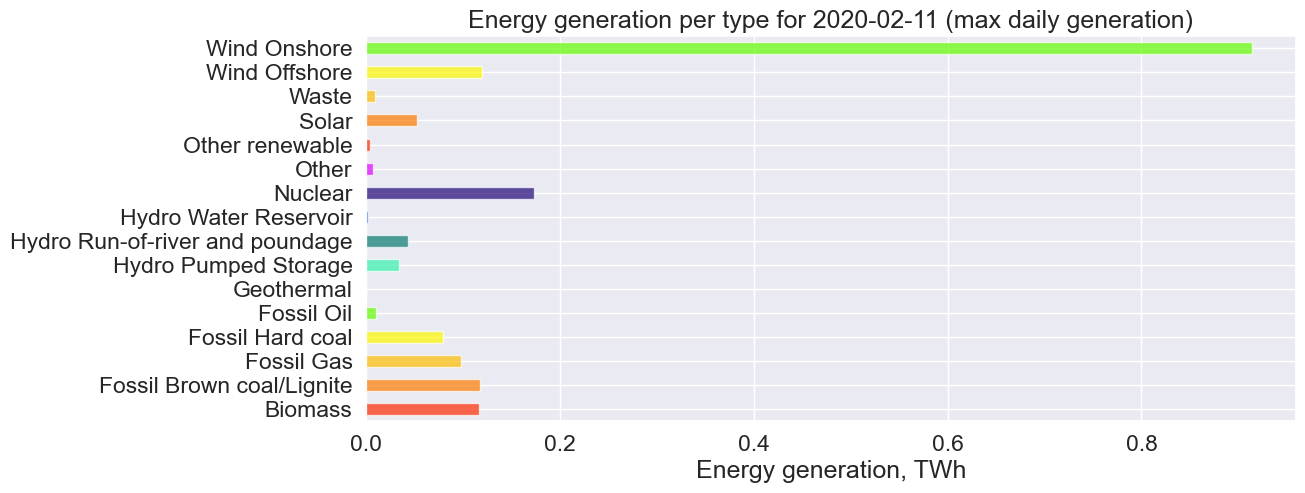

In [162]:
df_daily_ex.loc[str(ex_max_date)].plot.barh(figsize=(12,5), color=pal, alpha=0.7)

plt.xlabel('Energy generation, TWh')
plt.title(f'Energy generation per type for {str(ex_max_date)[:10]} (max daily generation)');

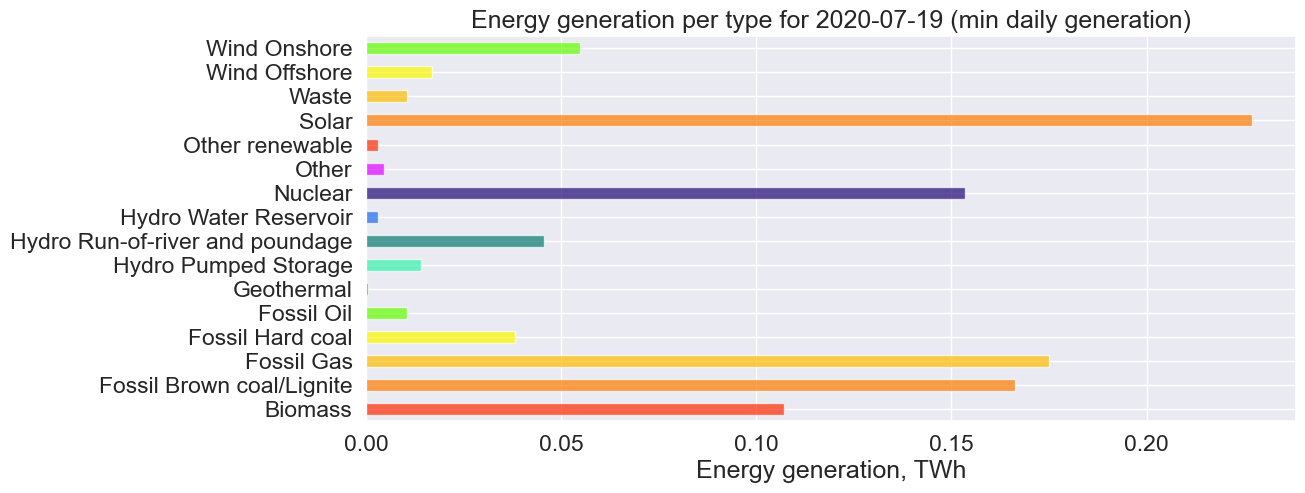

In [163]:
df_daily_ex.loc[str(ex_min_date)].plot.barh(figsize=(12,5), color=pal, alpha=0.7)

plt.xlabel('Energy generation, TWh')
plt.title(f'Energy generation per type for {str(ex_min_date)[:10]} (min daily generation)');

#### Max/Min daily generation when Germany is net importer

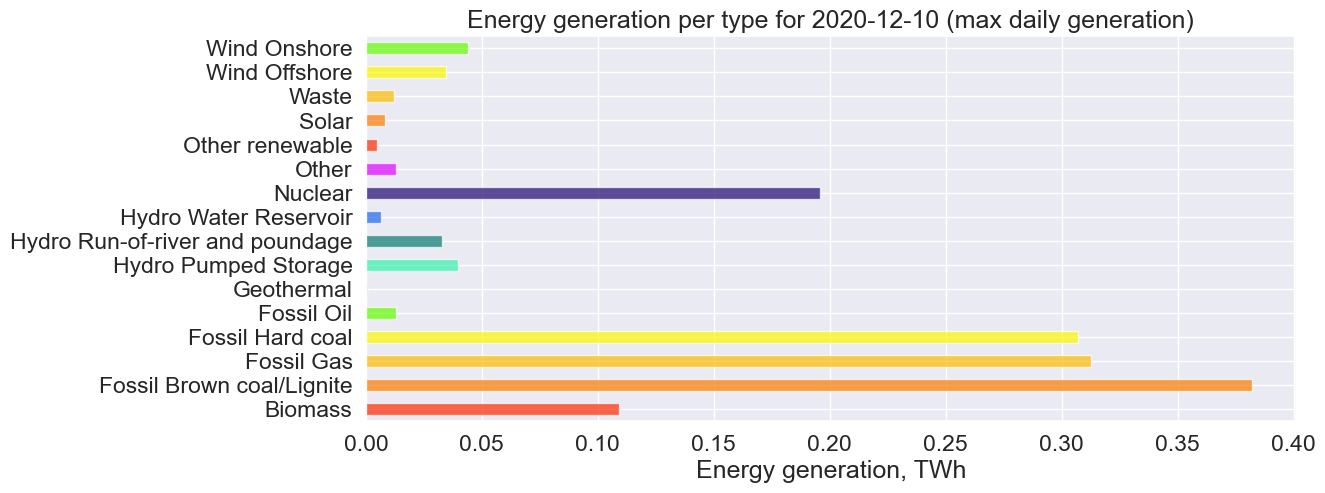

In [164]:
df_daily_im.loc[str(im_max_date)].plot.barh(figsize=(12,5), color=pal, alpha=0.7)

plt.xlabel('Energy generation, TWh')
plt.title(f'Energy generation per type for {str(im_max_date)[:10]} (max daily generation)');

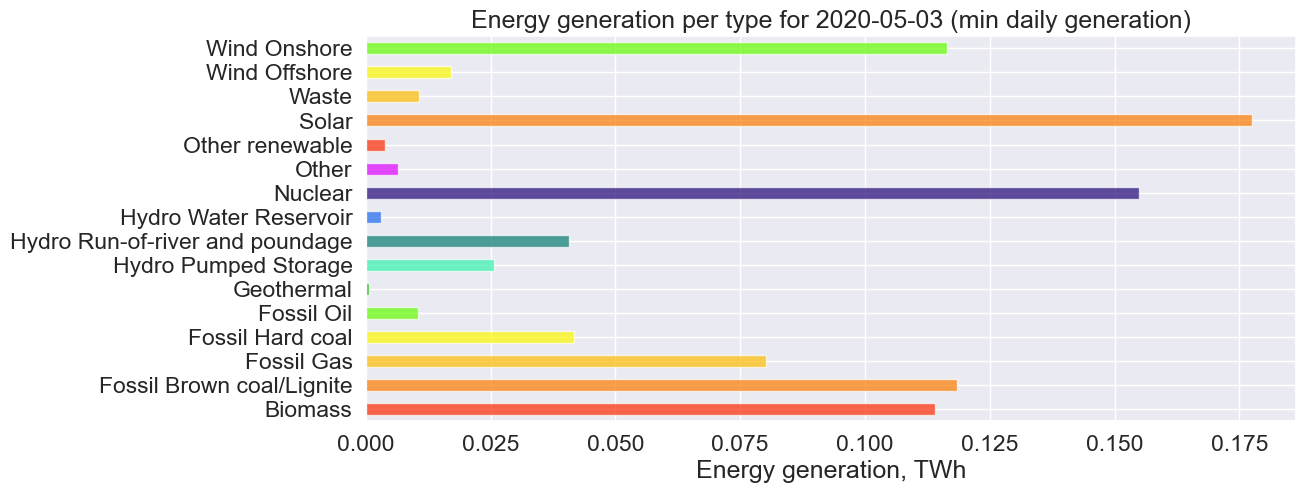

In [166]:
df_daily_im.loc[str(im_min_date)].plot.barh(figsize=(12,5), color=pal, alpha=0.7)

plt.xlabel('Energy generation, TWh')
plt.title(f'Energy generation per type for {str(im_min_date)[:10]} (min daily generation)');

### Total yearly generation by source type

In [42]:
# Sum up all rows
total_by_type = df_hourly.sum()
total_by_type = pd.DataFrame([total_by_type])
total_by_type

,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,40.284327,83.37401,59.126967,34.870502,3.889474,0.197799,10.570387,14.370701,1.212472,60.922896,2.628735,1.409938,45.822808,3.826159,26.86564,103.106678


In [49]:
# Rename columns for clarity
total_by_type.rename(columns={"Fossil Hard coal": "Hard coal", "Fossil Brown coal/Lignite": "Lignite",
                                    "Fossil Gas": "Gas", "Nuclear": "Nuclear", 
                                    "Solar": "Solar", "Biomass": "Bioenergy"}, inplace=True)

# Combine similar sources of generation
total_by_type['Other Fossil'] = total_by_type.iloc[:, [4, 10]].sum(axis=1)
total_by_type['Hydro'] = total_by_type.iloc[:, 6:9].sum(axis=1)
total_by_type['Wind'] = total_by_type.iloc[:, 14:16].sum(axis=1)
total_by_type['Other renewables'] = total_by_type.iloc[:, [5,11,13]].sum(axis=1)


cols = ['Hard coal', 'Lignite', 'Gas', 'Other Fossil', 'Nuclear', 
        'Wind', 'Solar', 'Bioenergy', 'Hydro', 'Other renewables']

total_by_type = total_by_type[cols]     
total_by_type 

,Hard coal,Lignite,Gas,Other Fossil,Nuclear,Wind,Solar,Bioenergy,Hydro,Other renewables
0,34.870502,83.37401,59.126967,6.518209,60.922896,129.972319,45.822808,40.284327,26.15356,5.433896


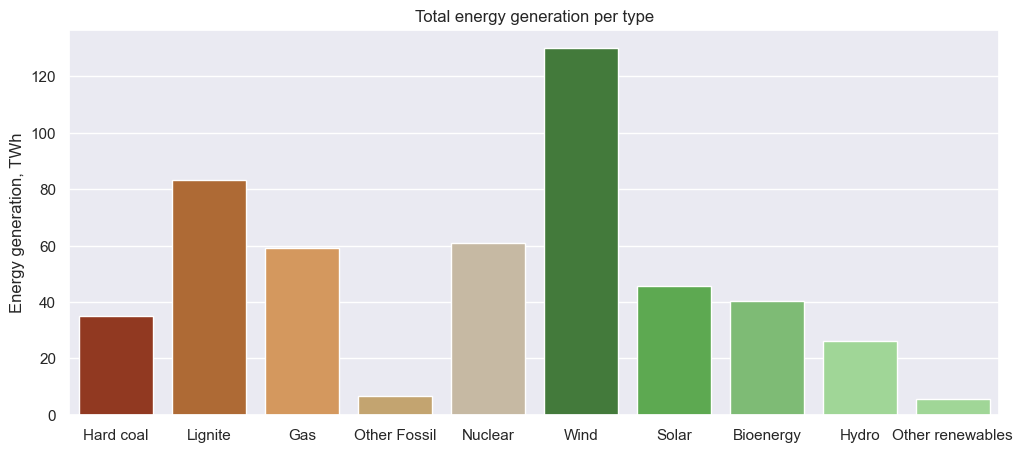

In [57]:
# Plot total generation barchart for each type of source
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
colors = ['#a32f0f', '#c26721', '#e8974a' , '#d1a762', '#ccba9d','#3b8530', '#52b842', '#76c769', '#98e08d',
          '#98e08d']

fig_1, ax = plt.subplots(figsize=(12,5), dpi=100)

sns.barplot(x=total_by_type.columns, y=total_by_type.iloc[0], palette=colors)
# axes_1 = total_by_type.plot(kind='bar',ax=axes_1, color=colors)
ax.set_ylabel('Energy generation, TWh')


ax.set_title('Total energy generation per type')
plt.show()